<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Методы машинного обучения</center></h1>
<h2><center>Введение в анализ сетевых структур: (Social) Network Analysis</center></h2>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

C сетями мы будем работать с помощью модуля [NetworkX](https://networkx.github.io/documentation/stable/). Функционала в нем постеменно становится больше и больше, но по скорости работы он сильно уступает библиотекам, реализованным на С и С++

In [3]:
import networkx as nx

## Создадим граф

In [4]:
g = nx.Graph()

In [5]:
g

In [6]:
# Как корабль назовешь..
g.graph['some title'] = 'first graph'

In [7]:
g.graph

{'some title': 'first graph'}

## Добавим вершины

In [8]:
g.add_node(1)

In [9]:
g.number_of_nodes()

1

In [10]:
g.add_node('some_node') # можно создавать вершины с произвольным* идентификатором

## Добавим ребра

In [11]:
g.add_edge(0, 1) # если вершины с идентификатором х еще не было, то она автоматически сгенерируется

In [12]:
g.edges()

EdgeView([(1, 0)])

In [13]:
g.nodes()

NodeView((1, 'some_node', 0))

In [14]:
g.add_edges_from([(0,2), 
                  (1,3), 
                  (4,3), 
                  (1,2), 
                  (2,2), 
                  (3,2)])

In [15]:
g.edges()

EdgeView([(1, 0), (1, 3), (1, 2), (0, 2), (2, 2), (2, 3), (3, 4)])

## Различные операции с вершинами и ребрами

In [16]:
g.degree() # Степени вершин (количество связей для каждой вершины)

DegreeView({1: 3, 'some_node': 0, 0: 2, 2: 5, 3: 3, 4: 1})

In [17]:
g.degree['some_node']

0

Вершинам можно задавать различные атрибуты (читай "признаки")

In [18]:
for n_id in g.nodes():
    g.node[n_id]['label'] = 'v_{}'.format(n_id)

In [19]:
nx.get_node_attributes(g, 'label')

{0: 'v_0', 1: 'v_1', 2: 'v_2', 3: 'v_3', 4: 'v_4', 'some_node': 'v_some_node'}

In [20]:
g.nodes[1]

{'label': 'v_1'}

In [21]:
g.nodes.data()

NodeDataView({1: {'label': 'v_1'}, 'some_node': {'label': 'v_some_node'}, 0: {'label': 'v_0'}, 2: {'label': 'v_2'}, 3: {'label': 'v_3'}, 4: {'label': 'v_4'}})

Иногда это удобнее делать так:

In [22]:
some_attributes = {0: 'val1', 1: 'val2'}
nx.set_node_attributes(g, some_attributes, 'attr')

In [23]:
g.nodes.data()

NodeDataView({1: {'label': 'v_1', 'attr': 'val2'}, 'some_node': {'label': 'v_some_node'}, 0: {'label': 'v_0', 'attr': 'val1'}, 2: {'label': 'v_2'}, 3: {'label': 'v_3'}, 4: {'label': 'v_4'}})

Тоже самое для ребер

In [24]:
g.edges[1,0]['type'] = 'friendship'

In [25]:
g.edges[1,0]

{'type': 'friendship'}

In [26]:
# проверка различных свойств графа
g.is_directed() 

False

In [27]:
nx.is_connected(g)

False

## Объединение графов

In [28]:
g1 = g.copy()
g2 = nx.erdos_renyi_graph(10, 0.3)

In [29]:
g3 = nx.disjoint_union(g1, g2)
# g3 = nx.union(g1, g2, rename=('g1_', 'g2_'))

In [30]:
print(g1.number_of_nodes())
print(g2.number_of_nodes())
print(g3.number_of_nodes())

6
10
16


In [31]:
g1.nodes()

NodeView((1, 'some_node', 0, 2, 3, 4))

In [32]:
g3.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

Создадите граф с рисунка

<img src='./img/clique_init.png' width="550"/>

In [33]:
g = nx.complete_graph(6)

g.add_nodes_from(range(6,10))
g.add_edges_from([(6,8), (6,7), (7,8), (8,9), (9,7)])

g.add_edges_from([(2,6), (1,7), (5,9)])

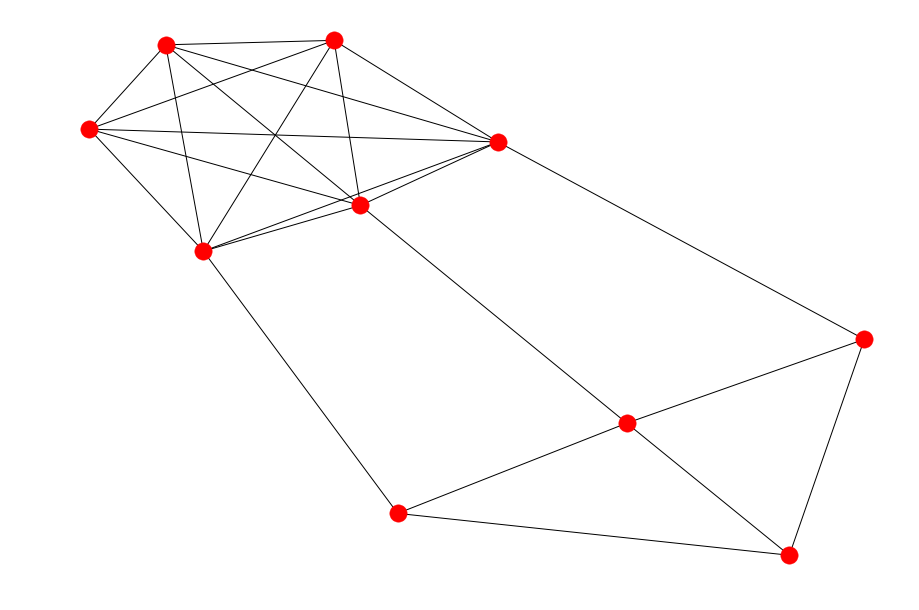

In [34]:
nx.draw_spring(g)

Выведем матрицу смежности, список смежности и список ребер этого графа

In [35]:
A = nx.adj_matrix(g)
A

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 46 stored elements in Compressed Sparse Row format>

In [36]:
A.todense()

matrix([[0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 1, 1, 0]], dtype=int64)

In [37]:
nx.adjacency_data(g)

{'adjacency': [[{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}],
  [{'id': 0}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}, {'id': 7}],
  [{'id': 0}, {'id': 1}, {'id': 3}, {'id': 4}, {'id': 5}, {'id': 6}],
  [{'id': 0}, {'id': 1}, {'id': 2}, {'id': 4}, {'id': 5}],
  [{'id': 0}, {'id': 1}, {'id': 2}, {'id': 3}, {'id': 5}],
  [{'id': 0}, {'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 9}],
  [{'id': 8}, {'id': 7}, {'id': 2}],
  [{'id': 6}, {'id': 8}, {'id': 9}, {'id': 1}],
  [{'id': 6}, {'id': 7}, {'id': 9}],
  [{'id': 8}, {'id': 7}, {'id': 5}]],
 'directed': False,
 'graph': [],
 'multigraph': False,
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8},
  {'id': 9}]}

Сохраним что-нибудь из этого:

In [38]:
nx.write_edgelist(g, 'graph.edglist')
nx.write_graphml(g, 'graph.gml')

In [39]:
!head graph.gml # на Windows не сработает

<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd"><graph edgedefault="undirected"><node id="0"/>
<node id="1"/>
<node id="2"/>
<node id="3"/>
<node id="4"/>
<node id="5"/>
<node id="6"/>
<node id="7"/>
<node id="8"/>


In [40]:
!head graph.edglist # на Windows не сработает

0 1 {}
0 2 {}
0 3 {}
0 4 {}
0 5 {}
1 2 {}
1 3 {}
1 4 {}
1 5 {}
1 7 {}


## (ваши) Соц-графы

* [Туториал](https://nbviewer.jupyter.org/github/allatambov/Py-programming-3/blob/master/15-06/lect-vk-api.ipynb) по выгрузке данных с помощью VKAPI

In [42]:
import json
import os

In [57]:
vkid = '1504653'
filepath = os.path.join('data', vkid, 'friends_{}.json'.format(vkid))

with open(filepath, 'r') as fin:
    friends_temp = json.load(fin)[0]

In [58]:
# Словарь с вашими друзьями
friends_temp

{'100615891': {'bdate': '16.6',
  'can_access_closed': True,
  'city': {'id': 1, 'title': 'Moscow'},
  'education_form': 'Full-time',
  'education_status': "Student (Bachelor's)",
  'faculty': 23,
  'faculty_name': 'Факультет вычислительной математики и кибернетики',
  'first_name': 'Danya',
  'graduation': 2021,
  'id': 100615891,
  'is_closed': False,
  'last_name': 'Chaychits',
  'online': 0,
  'relation': 0,
  'sex': 2,
  'university': 2,
  'university_name': 'МГУ'},
 '10073157': {'can_access_closed': True,
  'city': {'id': 105, 'title': 'Oryol'},
  'faculty': 0,
  'faculty_name': '',
  'first_name': 'Alexander',
  'graduation': 0,
  'id': 10073157,
  'is_closed': False,
  'last_name': 'Egurnov',
  'online': 0,
  'relation': 0,
  'sex': 2,
  'university': 0,
  'university_name': ''},
 '1015259': {'bdate': '18.8',
  'can_access_closed': True,
  'city': {'id': 1, 'title': 'Moscow'},
  'education_form': 'Full-time',
  'education_status': "Student (Bachelor's)",
  'faculty': 474,
  'fa

In [59]:
# Просто меняем строковый ключ на числовой
friends = dict()
for k in friends_temp.keys():
    friends[int(k)] = friends_temp[k]

In [60]:
filepath = os.path.join('data', vkid, 'common_friends_{}.json'.format(vkid))

with open(filepath, 'r') as fin:
    common_friends_temp = json.load(fin)

In [61]:
# Словарь с общими друзьями между вами и вашими друзьями
common_friends_temp

{'100615891': [2586168,
  10835168,
  18184109,
  21397719,
  25392823,
  27729308,
  27729853,
  32457377,
  36277177,
  50200048,
  60250410,
  64463420,
  84865114,
  85200919,
  96271000,
  101903018,
  117691326,
  127666067,
  150545386,
  155822234,
  155844941,
  166234253,
  168406509,
  171332234,
  189448307,
  208660180,
  212014790,
  212652550,
  216845554,
  228388961,
  251451716,
  269679460,
  280681626,
  291959133,
  308586868],
 '10073157': [50475,
  94220,
  721773,
  808258,
  1400496,
  1836729,
  2239033,
  3050361,
  3155411,
  3572696,
  4172549,
  5573026,
  5582823,
  7856036,
  8041845,
  9868749,
  12195014,
  16607104,
  19200342,
  26455650,
  42040640,
  54217993,
  78198135,
  90739126,
  197449761],
 '1015259': [29379,
  46790,
  105977,
  122316,
  138824,
  139259,
  151466,
  197643,
  395405,
  447690,
  909938,
  936157,
  1331785,
  2515478,
  3208444,
  3235590,
  3420621,
  6948314,
  22825215,
  78275850],
 '101903018': [2586168,
  10835168,

In [62]:
# Просто меняем строковый ключ на числовой
common_friends = dict()
for k in common_friends_temp.keys():
    common_friends[int(k)] = common_friends_temp[k]

In [63]:
g = nx.Graph()

In [64]:
friends

{12831: {'bdate': '16.5',
  'can_access_closed': True,
  'city': {'id': 1, 'title': 'Moscow'},
  'education_form': 'Full-time',
  'education_status': "Alumnus (Master's)",
  'faculty': 2080,
  'faculty_name': 'Факультет управления и прикладной математики',
  'first_name': 'Igor',
  'graduation': 2012,
  'id': 12831,
  'is_closed': False,
  'last_name': 'Slinko',
  'online': 0,
  'relation': 0,
  'sex': 2,
  'university': 297,
  'university_name': 'МФТИ'},
 46790: {'bdate': '24.12.1988',
  'can_access_closed': True,
  'city': {'id': 109, 'title': 'Penza'},
  'education_form': 'Full-time',
  'education_status': "Student (Bachelor's)",
  'faculty': 474,
  'faculty_name': 'Факультет бизнеса и менеджмента (Бизнес-информатики, Логистики, Менеджмента)',
  'first_name': 'Galya',
  'graduation': 2010,
  'id': 46790,
  'is_closed': False,
  'last_name': 'Tenisheva',
  'online': 0,
  'relation': 4,
  'relation_partner': {'first_name': 'Andrey',
   'id': 105977,
   'last_name': 'Glinsky'},
  'sex'

In [65]:
# Делаем список из пар (vkid, словарь с характеристиками)

g.add_nodes_from((fid, {'sex': friend.get('sex', -1), 
                        'first_name': friend.get('first_name', -1), 
                        'last_name': friend.get('last_name', -1), 
                        'university_name': friend.get('university_name', -1)}) for fid, friend in friends.items())

In [66]:
g.number_of_nodes()

322

In [67]:
# Делаем список из пар (vkid1, vkid2)
g.add_edges_from((f1, f2) for f1, f_list in common_friends.items() for f2 in f_list)

In [68]:
g.number_of_edges()

2912

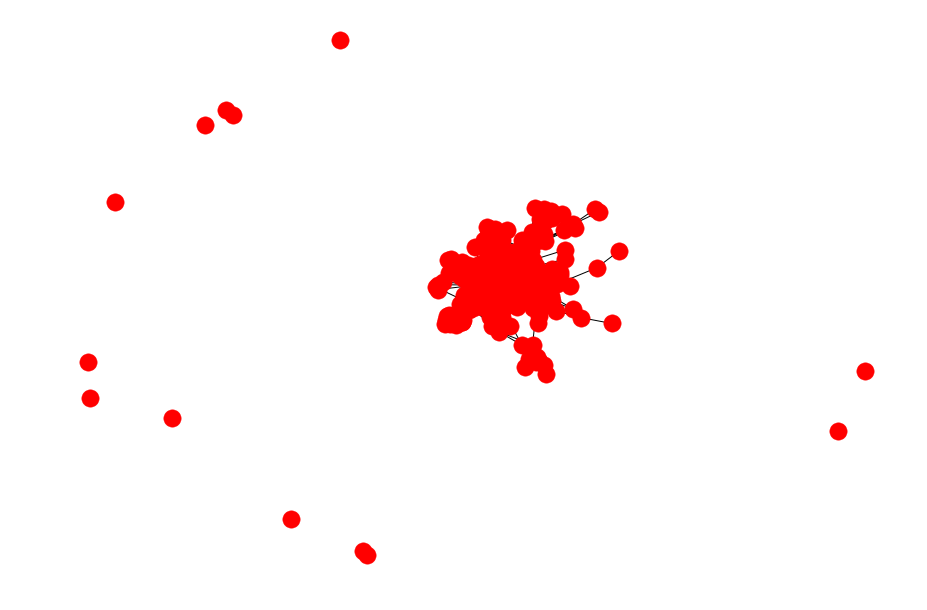

In [69]:
nx.draw(g)

In [70]:
nx.write_graphml(g, 'vk_graph.graphml')

Попробуем открыть это дело в gephi!

# Характеристики вершин/ребер сети

На основе сетевой структуры для вершин и ребер можно расчитать характеристики "важности" этих элементов.

Они еще называются "центральностями"

In [80]:
g_nx = nx.karate_club_graph()

In [81]:
g_nx.number_of_edges()

78

In [82]:
g_nx.number_of_nodes()

34

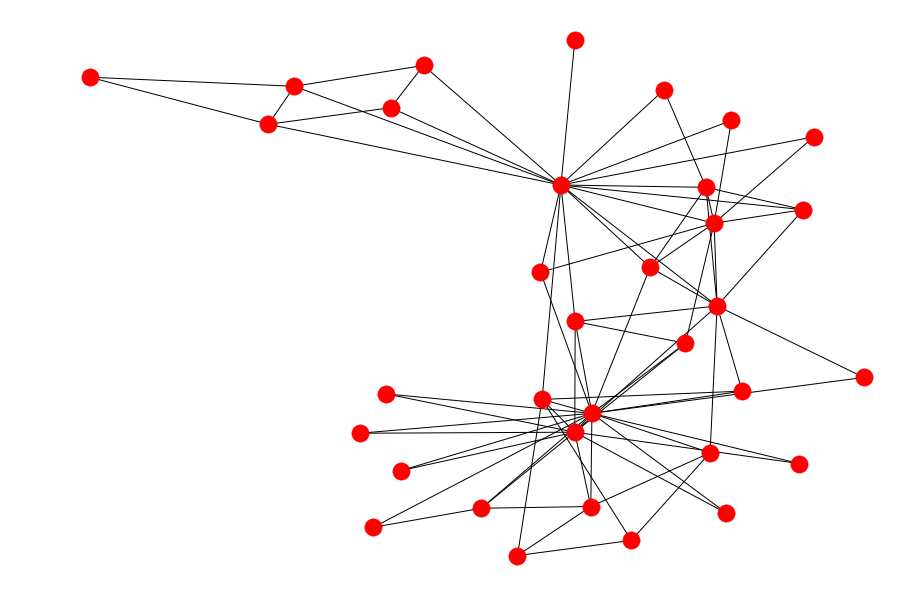

In [83]:
nx.draw(g_nx)

## Degree centrality

Самая оцевидная центральность - просто степень узла. Характеризует некоторую популярность узла (много друзей, много связей).

$$ C_d(i) = k(i) = \sum_jA_{ij} = \sum_iA_{ij}$$
$$ \bar{C}_d(i) = \frac{1}{n-1} C_d(i)$$

Существует обобщение на ориентированные (prestige) и взвешенные сети.

In [99]:
degr = g_nx.degree()
degr_cent = nx.centrality.degree_centrality(g_nx)

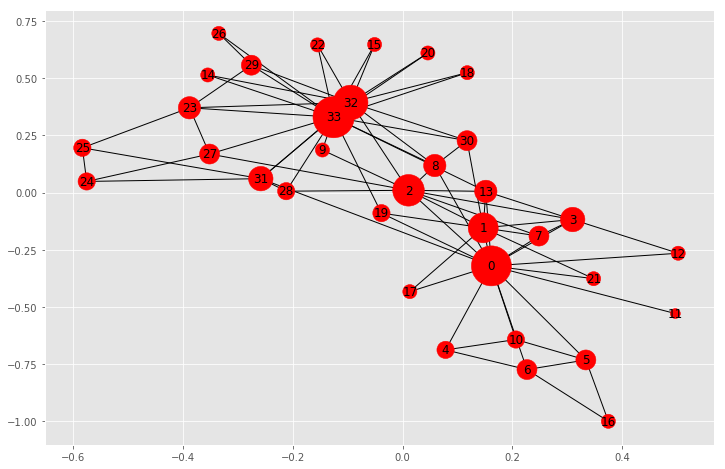

In [98]:
degr = np.array(degr)[:,1] * 100
nx.draw_networkx(g_nx, node_size=degr)

## Closeness centrality

Центральность, основанная на расстоянии до остальных вершин в графе.

$$ C_{cl}(i) = \frac{1}{\sum_j d(i,j)} $$

$$ \bar{C}_{cl}(i) = (n-1) \cdot C_{cl}(i) $$

Актор, расположенный в центре сети может быстро добраться до остальных акторов. Акторы на периферии расположены дальше.

**Вопрос:** что будет, если граф окажется несвязным?

In [102]:
closeness_nodes = nx.centrality.closeness_centrality(g_nx)

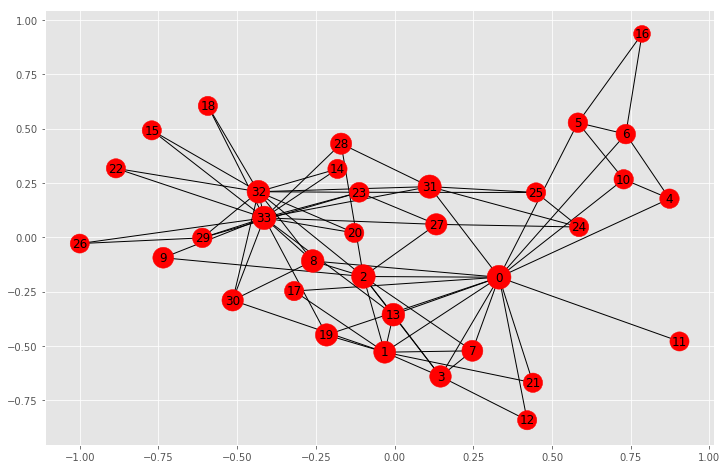

In [103]:
closeness = np.array(list(closeness_nodes.values())) * 1000
nx.draw_networkx(g_nx, node_size=closeness)

## Betweenness centrality (nodes)

Пусть $\sigma_{st}$ - количество кратчайших путей между вершинами $s$ и $t$, а $\sigma_{st}(i)$ - кр. пути между $v_s$ и $v_t$, которые проходят через вершину $v_i$.

Тогда 
$$ C_b(i) = \sum\limits_{s\neq t\neq i} \frac{\sigma_{st}(i)}{\sigma_{st}} $$

$$ \bar{C}_b(i) = \frac{2}{(n-1)(n-2)}C_b(i) $$

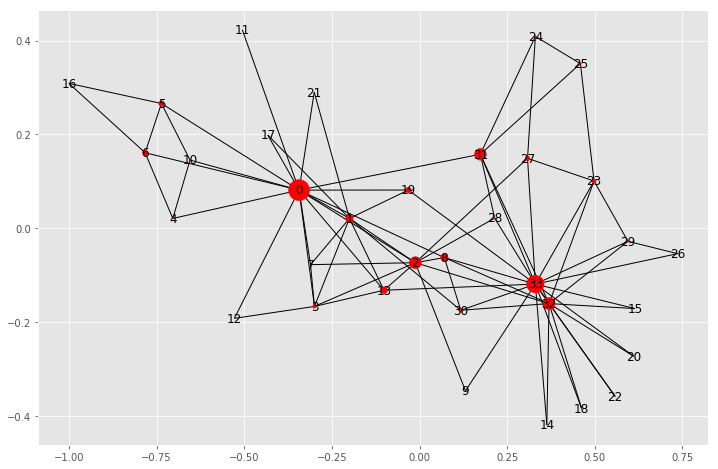

In [109]:
betw_nodes = nx.betweenness_centrality(g_nx) 

betw = np.array(list(betw_nodes.values())) * 1000
nx.draw_networkx(g_nx, node_size=betw)

## Betweenness centrality (edges)

Betweenness также можно расчитывать для ребер! Давайте определим для каких ребер она наибольшая и что это может нам дать?

In [110]:
betw_edg = nx.centrality.edge_betweenness_centrality(g_nx)

In [111]:
sources = []
targets = []
betw = []
for e, b in betw_edg.items():
    sources.append(e[0])
    targets.append(e[1])
    betw.append(b)
df = pd.DataFrame({'source': sources, 
                   'target': targets,
                   'betw': betw})

In [112]:
df.sort_values('betw', ascending=False).head()

,source,target,betw
15,0,31,0.127260
5,0,6,0.078134
4,0,5,0.078134
1,0,2,0.077788
7,0,8,0.074240


## Page Rank

Идея PageRank заключается в попытке описать блуждание по вершинам графа. Вероятность перехода в вершину $v_i$ обратнопропорциональна степеням входящих связанных с ней вершин.

$$p^{t+1} = (D^{-1}A)^\top p^t = P^\top p^t$$

Помимо случайного блуждания между соседними вершинами заложен механизм "телепорта" между случайными вершинами с вероятностью $1-\alpha$.

$$ \mathbb{P} = \alpha P + \frac{(1 - \alpha)}{n} E,$$
где $E$ - это матрица состоящая из единиц.

Аналогичным образом решается задача на поиск собственного числа

$$\mathbb{P}^\top p = \lambda p$$

In [ ]:
pr_nodes = nx.pagerank(g_nx)
pr = np.array(list(pr_nodes.values())) * 1500

nx.draw_networkx(g_nx, node_size=pr)

## "Геометрическая" центральность

Eccentricity - максимальная длина кратчайшего пути из вершины $i$ до всех остальных вершин $e(i) = \max\limits_j d(i, j)$.

Диаметр - $\max e(i)$<br/>
Радиус - $\min e(i)$

Центральными вершинами являются те, у которых $e(i)$ равна радиусу графа

In [ ]:
print(nx.radius(g_nx))
print(nx.diameter(g_nx))

In [ ]:
ecc_nodes = nx.eccentricity(g_nx)
ecc = np.array(list(ecc_nodes.values())) * 100

nx.draw_networkx(g_nx, node_size=ecc)

### Clustering coefficient

Доля "треугольников" в окресности вершины.

In [ ]:
# nx.transitivity(g_nx)
nx.triangles(g_nx)